In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsRegressor
from os import system
from pandas import read_csv, DataFrame
from sklearn import svm
from time import time
from scipy.stats import randint as sp_randint
from IPython.display import display
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('adult.data',header=None,index_col=False,names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                                                                   'marital-status', 'occupation', 'relationship', 
                                                                   'race', 'sex', 'capital-gain', 'capital-loss','hours-per-week', 
                                                                   'native-country', 'income'])

In [37]:
data_dummies = pd.get_dummies(data)
print(list(data_dummies.columns))


['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair',

In [65]:
features = data_dummies.loc[:,'age':'native-country_ Yugoslavia']
X = features.values
y = data_dummies['income_ >50K'].values

(32561, 108)

In [13]:
from sklearn.feature_selection import RFECV
m = RFECV(RandomForestClassifier(), scoring='accuracy')
m.fit(X, y)
m.score(X, y)

0.9884217315193022

In [43]:
# build a classifier
clf = RandomForestClassifier(n_estimators=20)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 23.01 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.859 (std: 0.003)
Parameters: {'bootstrap': True, 'min_samples_leaf': 4, 'min_samples_split': 10, 'criterion': 'entropy', 'max_features': 9, 'max_depth': None}

Model with rank: 1
Mean validation score: 0.859 (std: 0.003)
Parameters: {'bootstrap': False, 'min_samples_leaf': 7, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features': 8, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.859 (std: 0.004)
Parameters: {'bootstrap': True, 'min_samples_leaf': 6, 'min_samples_split': 3, 'criterion': 'gini', 'max_features': 9, 'max_depth': None}



In [ ]:
#RandomizedSearchCV took 23.01 seconds for 20 candidates parameter settings.
#Model with rank: 1
#Mean validation score: 0.859 (std: 0.003)
#Parameters: {'bootstrap': True, 'min_samples_leaf': 4, 'min_samples_split': 10, 'criterion': 'entropy', 'max_features': 9, 'max_depth': None}

In [47]:
# build a classifier
clf = GradientBoostingClassifier(n_estimators=20)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11)}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 134.30 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.864 (std: 0.003)
Parameters: {'max_features': 8, 'min_samples_split': 9, 'max_depth': None, 'min_samples_leaf': 7}

Model with rank: 2
Mean validation score: 0.862 (std: 0.002)
Parameters: {'max_features': 8, 'min_samples_split': 7, 'max_depth': None, 'min_samples_leaf': 6}

Model with rank: 3
Mean validation score: 0.862 (std: 0.003)
Parameters: {'max_features': 9, 'min_samples_split': 4, 'max_depth': None, 'min_samples_leaf': 3}



In [52]:
#GradientBoostingClassifier Classifier(2 try)
gb = GradientBoostingClassifier(n_estimators=20,max_features= 9, min_samples_split=4, max_depth=None, min_samples_leaf= 3)
scores = cross_val_score(gb,X,y,cv=5,scoring='accuracy')
print(scores)
print scores.mean()


[0.86058652 0.85887592 0.86455774 0.86440418 0.86409705]
0.8625042817408086


NameError: name 'names_alg' is not defined

In [54]:
gb.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=None,
              max_features=9, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [103]:
features_plot = np.array(data_dummies.columns)
np.delete(features_plot,109)
np.delete(features_plot,108)
fea

array(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_ 10th', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-

In [57]:
gb.feature_importances_.shape

(108,)

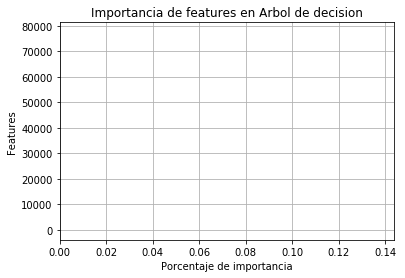

In [77]:
import matplotlib.pyplot as plt
plt.barh(features_plot,gb.feature_importances_)
plt.xlabel("Porcentaje de importancia")
plt.ylabel("Features")
plt.title("Importancia de features en Arbol de decision")
plt.grid(True)

In [58]:
features_cols = ['age', 'education', 'capital-gain','capital-loss','race','sex','native-country']
X = data[features_cols]
le = preprocessing.LabelEncoder()
X['native-country'] = le.fit_transform(X['native-country'])
X['sex'] = le.fit_transform(X['sex'])
X['education'] = le.fit_transform(X['education'])
X['race'] = le.fit_transform(X['race'])
y = data['income']
y = le.fit_transform(y)
print X.head()

   age  education  capital-gain  capital-loss  race  sex  native-country
0   50          9             0             0     4    1              39
1   38         11             0             0     4    1              39
2   53          1             0             0     2    1              39
3   28          9             0             0     2    0               5
4   37         12             0             0     4    0              39


C:\Users\Jose Manuel\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Jose Manuel\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Jose Manuel\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [214]:
#KNN neighbours Classifier(first try)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
print(scores.mean())
names_alg.append("KNeighborsClassifier")
total_scores.append(scores.mean())

0.8221747520644159


In [13]:
k_range = list(range(1, 20))
k_scores = []
k_numbers=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    k_numbers.append(k)
print(k_scores)

[0.7894962889093848, 0.8282560029481522, 0.8136368193348803, 0.8297299780878584, 0.8221747520644159, 0.831173514195774, 0.8256144140370122, 0.8332313292432486, 0.8312963878921465, 0.8335998183006517, 0.8331390831538095, 0.8334462886459646, 0.833661252770048, 0.8342449229142705, 0.8337841547743468, 0.8343675372425083, 0.8346439641728842, 0.8353196492840527, 0.8338146456571678]


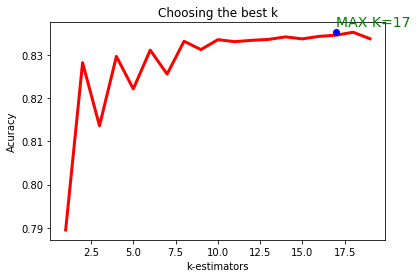

In [215]:
import matplotlib.pyplot as plt 
nparrayk_scores=np.array(k_scores)
print 
print 
plt.plot(k_numbers,k_scores,'r',linewidth=3.0)
plt.plot(nparrayk_scores.argmax(),nparrayk_scores.max(),'bo',linewidth=5.0)
plt.ylabel('Acuracy')
plt.title('Choosing the best k')
plt.xlabel('k-estimators')
aux=nparrayk_scores.argmax()
aux=u'MAX K='+np.string_(aux)
plt.text(x = nparrayk_scores.argmax(), y = nparrayk_scores.max()+0.0015, s = aux, fontsize = 14,color='green')
plt.show()

In [216]:
#RandomForestClassifier Classifier(2 try)
rf = RandomForestClassifier(n_estimators=20,max_depth=100)
scores = cross_val_score(rf,X,y,cv=5,scoring='accuracy')
print(scores.mean())
names_alg.append("RandomForestClassifier")
total_scores.append(scores.mean())

0.8349509385628247


In [217]:
#AdaBoostClassifier Classifier(2 try)
ada = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(ada,X,y,cv=5,scoring='accuracy')
print(scores.mean())
names_alg.append("AdaBoostClassifier")
total_scores.append(scores.mean())

0.8409399481248412


In [218]:
#GradientBoostingClassifier Classifier(2 try)
gb = GradientBoostingClassifier(n_estimators=200,)
scores = cross_val_score(gb,X,y,cv=5,scoring='accuracy')
print(scores)
print scores.mean()
names_alg.append("GradientBoostingClassifier")
total_scores.append(scores.mean())

[0.84339014 0.84659091 0.85273342 0.84904791 0.84641376]
0.8476352279981123


In [1]:
X_ent,X_test,Y_ent,Y_test=train_test_split(X,y)

NameError: name 'train_test_split' is not defined

In [224]:
work_data = pd.DataFrame()
features_cols = ['age', 'education', 'capital-gain','capital-loss','race','sex','native-country']
work_data["age"] =le.fit_transform(data["age"]) 
work_data["education"] =le.fit_transform (data["education"])
work_data["capital-gain"] = le.fit_transform (data["capital-gain"])
work_data["capital-loss"] =le.fit_transform (data["capital-loss"])
work_data["race"] =le.fit_transform (data["race"])
work_data["sex"] = le.fit_transform(data["sex"])
work_data["native-country"] = le.fit_transform(data["native-country"])
work_data["income"]=le.fit_transform(data["income"])
print le.fit_transform(data["income"])
#######################################################

workcla=tree.DecisionTreeClassifier(max_depth=15)

workcla.fit(work_data[['age', 'education', 'capital-gain','capital-loss','race','sex','native-country']],work_data["income"])
scores = cross_val_score(workcla,X,y,cv=10,scoring='accuracy')

print ">>>>> DecisionTreeClassifier <<<<<"
print scores
#resultado
print scores.mean()
names_alg.append("DecisionTreeClassifier")
total_scores.append(scores.mean())
tree.export_graphviz(workcla,out_file='arbol.txt',class_names=['<=50','>50'],feature_names=features_cols,impurity=False,filled=True)

[0 0 0 ... 0 0 1]
>>>>> DecisionTreeClassifier <<<<<
[0.82898373 0.83415233 0.84090909 0.84060197 0.84213759 0.84183047
 0.82954545 0.84520885 0.83722359 0.83993856]
0.8380531620033388


In [225]:
print workcla.feature_importances_

[0.21579811 0.17086473 0.35712635 0.14808392 0.0122753  0.06922896
 0.02662263]


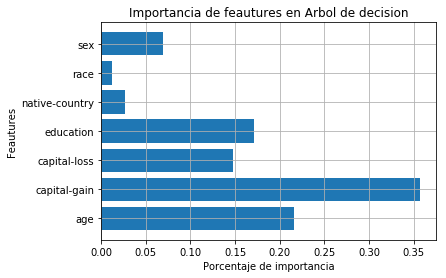

In [226]:
import matplotlib.pyplot as plt
plt.barh(da,workcla.feature_importances_)
plt.xlabel("Porcentaje de importancia")
plt.ylabel("Features")
plt.title("Importancia de features en Arbol de decision")
plt.grid(True)

In [227]:
#Para ver la incertidumbre usando Support Vector Machines:

In [228]:
algoritmo=svm.SVC(probability=True)

In [229]:
algoritmo.fit(X_ent,Y_ent)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [230]:
algoritmo.decision_function_shape="ovr"
algoritmo.decision_function(X_test)[:10]

array([-1.02166316, -1.00292522, -1.00018978, -1.09938825, -0.99997909,
       -1.00010493, -0.99974597, -1.00012977, -1.00003327, -1.00037678])

In [231]:
algoritmo.predict_proba(X_test)[:10]

array([[0.85404268, 0.14595732],
       [0.84963146, 0.15036854],
       [0.84897839, 0.15102161],
       [0.8712049 , 0.1287951 ],
       [0.84892799, 0.15107201],
       [0.84895809, 0.15104191],
       [0.84887221, 0.15112779],
       [0.84896404, 0.15103596],
       [0.84894095, 0.15105905],
       [0.84902311, 0.15097689]])

In [232]:
print algoritmo.predict(X_test)[:30]
print (Y_test)[:30]
algoritmo.score(X_test,Y_test)
names_alg.append("Support Vector Machines")
total_scores.append(algoritmo.score(X_test,Y_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0]


In [233]:
#scores = cross_val_score(algoritmo,X_test,Y_test,cv=3,scoring='accuracy')

In [234]:
lRg=LogisticRegression()
lRg.fit(X,y)
score=cross_val_score(lRg,X_test,Y_test,cv=5,scoring='accuracy')

In [237]:
names_alg.append("LogisticRegression")
total_scores.append(score.mean())
score.mean()
names_alg

['KNeighborsClassifier',
 'RandomForestClassifier',
 'AdaBoostClassifier',
 'GradientBoostingClassifier',
 'KNeighborsRegressor',
 'KNeighborsRegressor',
 'KNeighborsRegressor',
 'DecisionTreeClassifier',
 'Support Vector Machines',
 'LogisticRegression',
 'LogisticRegression']

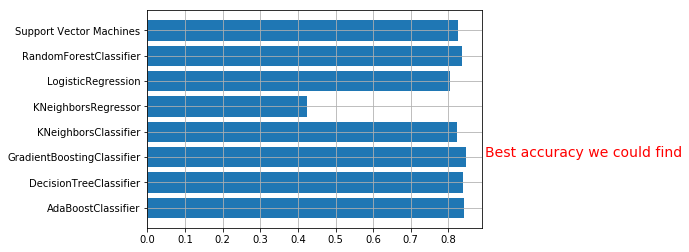

In [281]:
plt.barh(names_alg,total_scores)
plt.grid(True)

plt.text(x = nptotal_scores.max()+0.05,y=npnames_alg[nptotal_scores.argmax()],s='Best accuracy we could find',fontsize = 14,color='red')
plt.show()